In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import datetime
from pandas import DataFrame

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%matplotlib inline

## Подготовим данные

### Датасет по коронaвирусу 
https://ourworldindata.org/coronavirus-source-data

In [2]:
df_corona = pd.read_csv("/home/dmitry/Загрузки/full_data.csv")
# Преобразуем дату для возможности сравнения дат
df_corona.date= pd.to_datetime(df_corona.date)

### Датасет по ВВП
https://datasource.kapsarc.org/explore/dataset/gdp-ppp-the-world-bank/information/?disjunctive.country_name

In [3]:
df_gdp = pd.read_csv("/home/dmitry/Загрузки/gdp-ppp-the-world-bank.csv", delimiter=";")
# Переименовываем колонки и выкидываем лишние для сливания с основным датасетом
df_gdp.rename({"Country Name": "location", "GDP PPP (current international $)": "GDP"}, axis=1, inplace=True)
df_gdp.drop(columns="Year", inplace=True)
df_gdp.location[df_gdp.location == "Russian Federation"] = "Russia"
df_gdp.head()

/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,location,GDP
0,Afghanistan,7.267225e+10
1,United Arab Emirates,7.230467e+11
2,Argentina,9.170570e+11
3,Armenia,3.053074e+10
4,Austria,4.906097e+11


### Датасет по численности населения 
https://datasource.kapsarc.org/explore/dataset/world-population/information/?disjunctive.country_name

In [4]:
df_population = pd.read_csv("/home/dmitry/Загрузки/world-population.csv", delimiter=";")
# Переименовываем колонки и выкидываем лишние для сливания с основным датасетом
df_population.rename({"Country Name": 'location'}, axis=1, inplace=True)
df_population.drop(columns="Year", inplace=True)
df_population.location[df_population.location == "Russian Federation"] = "Russia"
df_population.head()

/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,location,Population
0,American Samoa,55465.0
1,Andorra,77006.0
2,Austria,8847037.0
3,Bangladesh,161356039.0
4,Bermuda,63968.0


#### Общие данные по миру в отдельный датафрейм

In [5]:
df_corona_world = df_corona[df_corona.location == "World"]
df_corona_world.tail()

,date,location,new_cases,new_deaths,total_cases,total_deaths
10380,2020-04-08,World,74902,7412,1391888,81477
10381,2020-04-09,World,84930,6339,1476818,87816
10382,2020-04-10,World,87039,7223,1563857,95039
10383,2020-04-11,World,89349,7049,1653206,102088
10384,2020-04-12,World,81707,6104,1734913,108192


In [6]:
df_corona_country = df_corona[df_corona.location != "World"]
df_corona_country.tail()

,date,location,new_cases,new_deaths,total_cases,total_deaths
10431,2020-04-08,Zimbabwe,1,0,10,1
10432,2020-04-09,Zimbabwe,1,1,11,2
10433,2020-04-10,Zimbabwe,0,1,11,3
10434,2020-04-11,Zimbabwe,0,0,11,3
10435,2020-04-12,Zimbabwe,3,0,14,3


#### Добавляем отношение числа случаев к ВВП и населению

In [7]:
df_corona_country = df_corona_country.merge(df_population)
df_corona_country = df_corona_country.merge(df_gdp)

# население в миллионы, ВВП в миллиарды
df_corona_country.Population = df_corona_country.Population/1000000
df_corona_country.GDP = df_corona_country.GDP/1000000000

df_corona_country["total_by_gdp"] = df_corona_country.total_cases/df_corona_country.GDP
df_corona_country["total_by_pop"] = df_corona_country.total_cases/df_corona_country.Population

df_corona_country.tail()

,date,location,new_cases,new_deaths,total_cases,total_deaths,Population,GDP,total_by_gdp,total_by_pop
8497,2020-04-08,Zimbabwe,1,0,10,1,14.439018,43.747236,0.228586,0.692568
8498,2020-04-09,Zimbabwe,1,1,11,2,14.439018,43.747236,0.251444,0.761825
8499,2020-04-10,Zimbabwe,0,1,11,3,14.439018,43.747236,0.251444,0.761825
8500,2020-04-11,Zimbabwe,0,0,11,3,14.439018,43.747236,0.251444,0.761825
8501,2020-04-12,Zimbabwe,3,0,14,3,14.439018,43.747236,0.320020,0.969595


#### Дата  последних данных

In [8]:
LAST_DATE = df_corona_country.iloc[-1].date

#### Общий стиль графиков

In [9]:
plt.style.use('fivethirtyeight')

## Посмотрим общую ситуацию в мире

Text(0, 0.5, 'Число случаев (тысяч)')

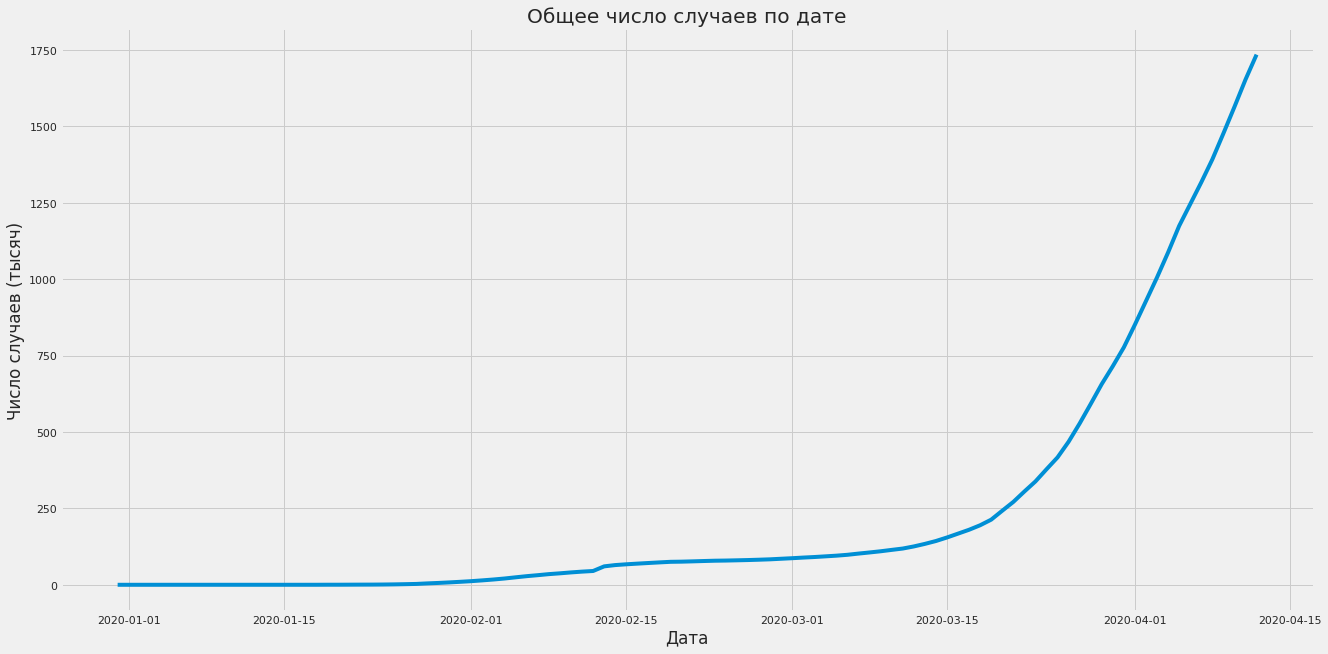

In [10]:
plt.figure(figsize=(20, 10))
plt.plot(df_corona_world.date, df_corona_world.total_cases/1000)
plt.title("Общее число случаев по дате")
plt.xlabel("Дата")
plt.ylabel("Число случаев (тысяч)")

Text(0, 0.5, 'Число случаев')

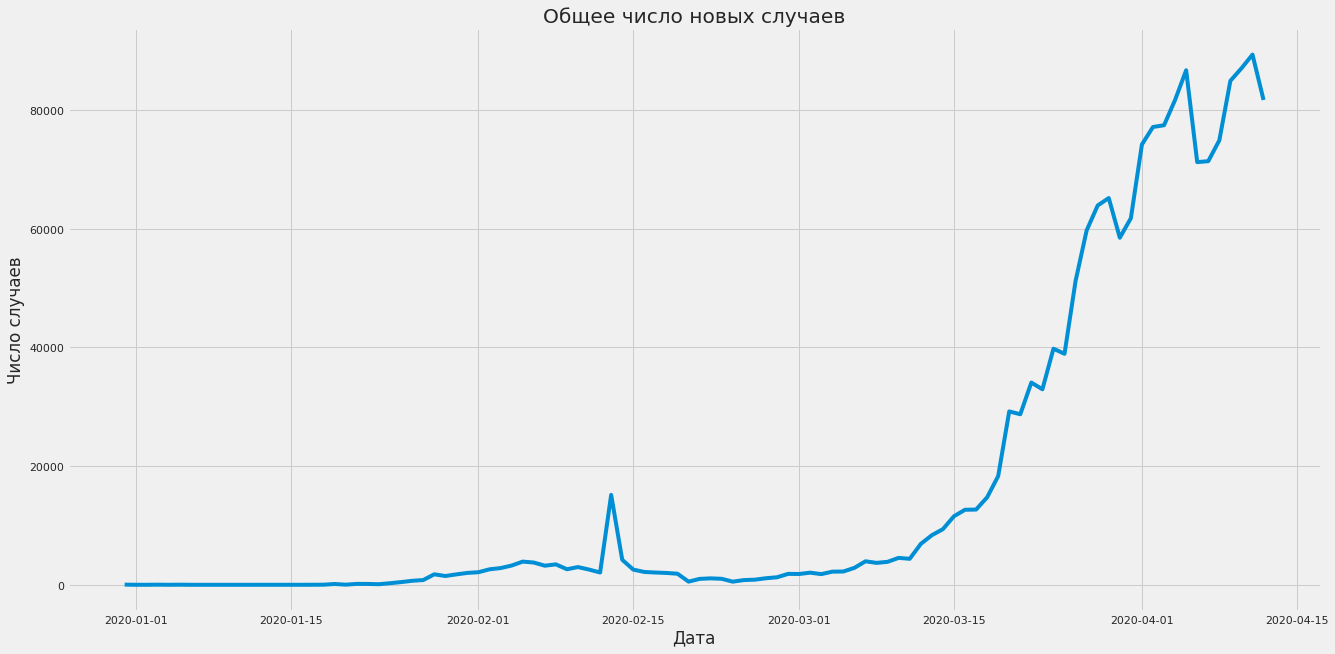

In [11]:
plt.figure(figsize=(20, 10))
plt.plot(df_corona_world.date, df_corona_world.new_cases)
plt.title("Общее число новых случаев")
plt.xlabel("Дата")
plt.ylabel("Число случаев")

## Сравним Россию с другими странами

In [13]:
country = "Russia"
df_r = df_corona_country[df_corona_country.location == country]

country = "Italy"
df_i = df_corona_country[df_corona_country.location == country]

country = "China"
df_c = df_corona_country[df_corona_country.location == country]

country = "United States"
df_u = df_corona_country[df_corona_country.location == country]

Text(0, 0.5, 'Число случаев')

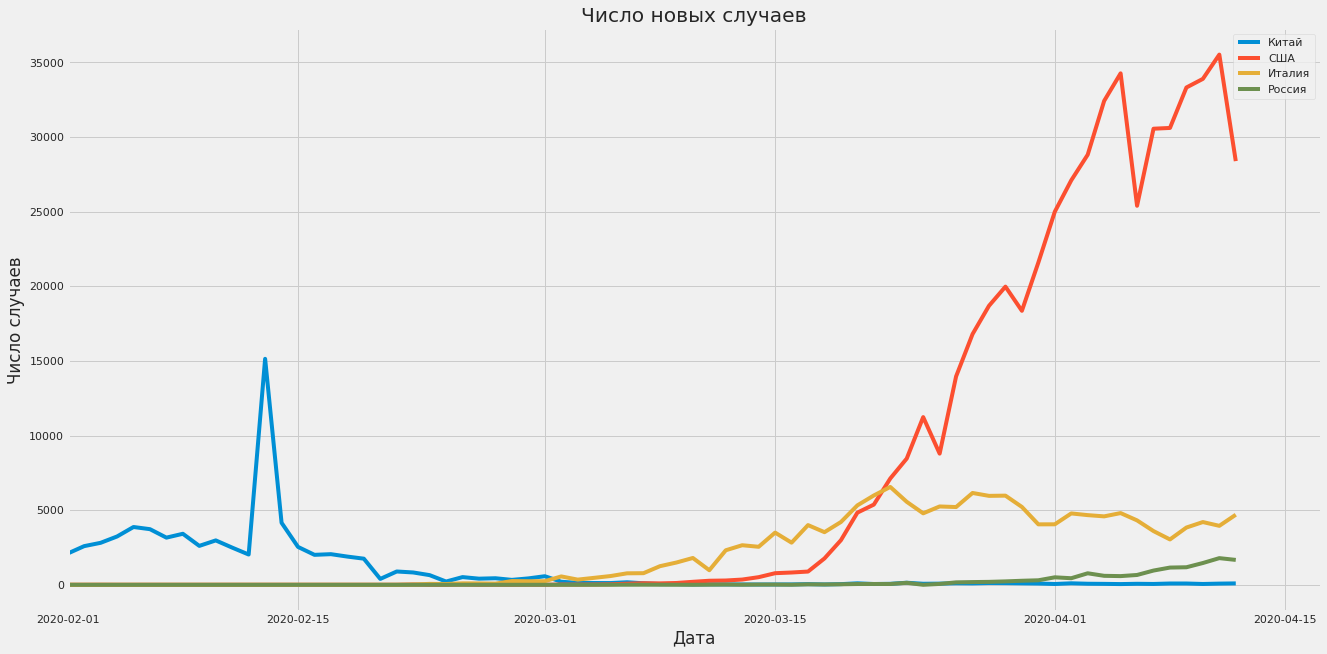

In [14]:
plt.figure(figsize=(20, 10))
plt.plot(df_c.date, df_c.new_cases, label="Китай")
plt.plot(df_u.date, df_u.new_cases, label="США")
plt.plot(df_i.date, df_i.new_cases, label="Италия")
plt.plot(df_r.date,df_r.new_cases, label="Россия")
plt.xlim(pd.to_datetime("2020-02-01"))
plt.legend()

plt.title("Число новых случаев")
plt.xlabel("Дата")
plt.ylabel("Число случаев")





Text(0, 0.5, 'Число случаев')

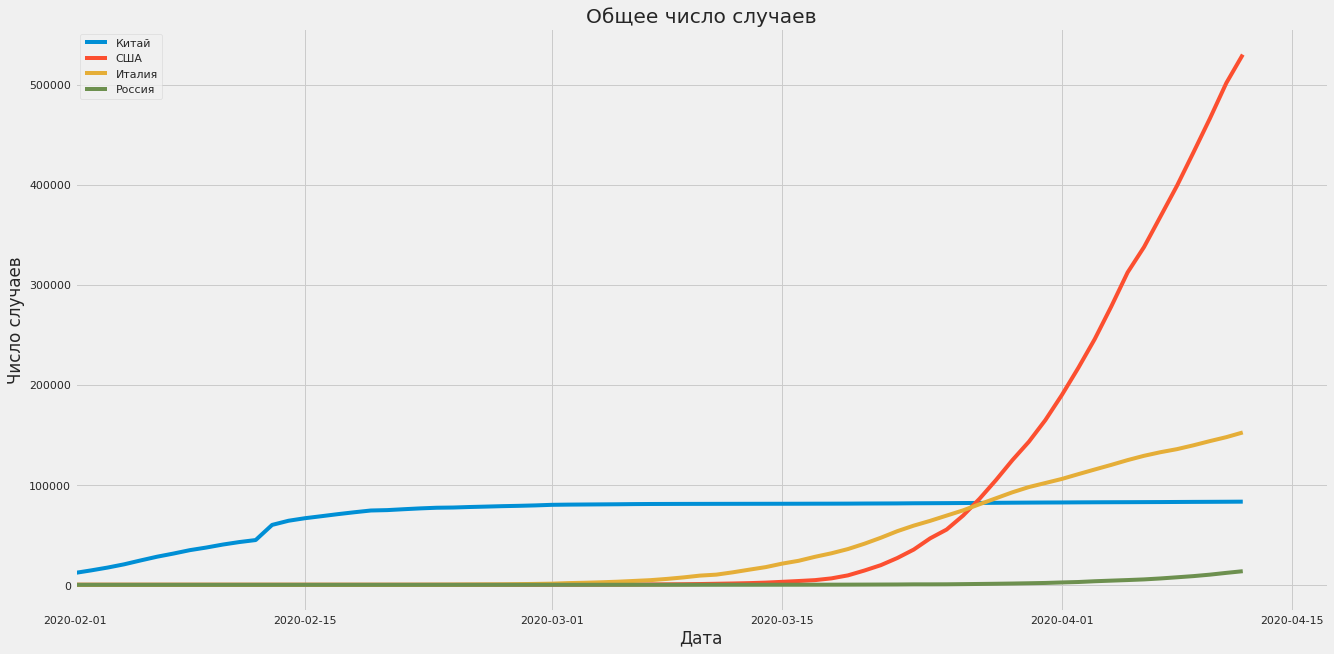

In [16]:
plt.figure(figsize=(20, 10))
plt.plot(df_c.date, df_c.total_cases, label="Китай")
plt.plot(df_u.date, df_u.total_cases, label="США")
plt.plot(df_i.date, df_i.total_cases, label="Италия")
plt.plot(df_r.date,df_r.total_cases, label="Россия")
plt.xlim(pd.to_datetime("2020-02-01"))
plt.legend()

plt.title("Общее число случаев")
plt.xlabel("Дата")
plt.ylabel("Число случаев")


## Посмотрим как менялись "лидеры" за последнее время

Как менялся топ-10 стран

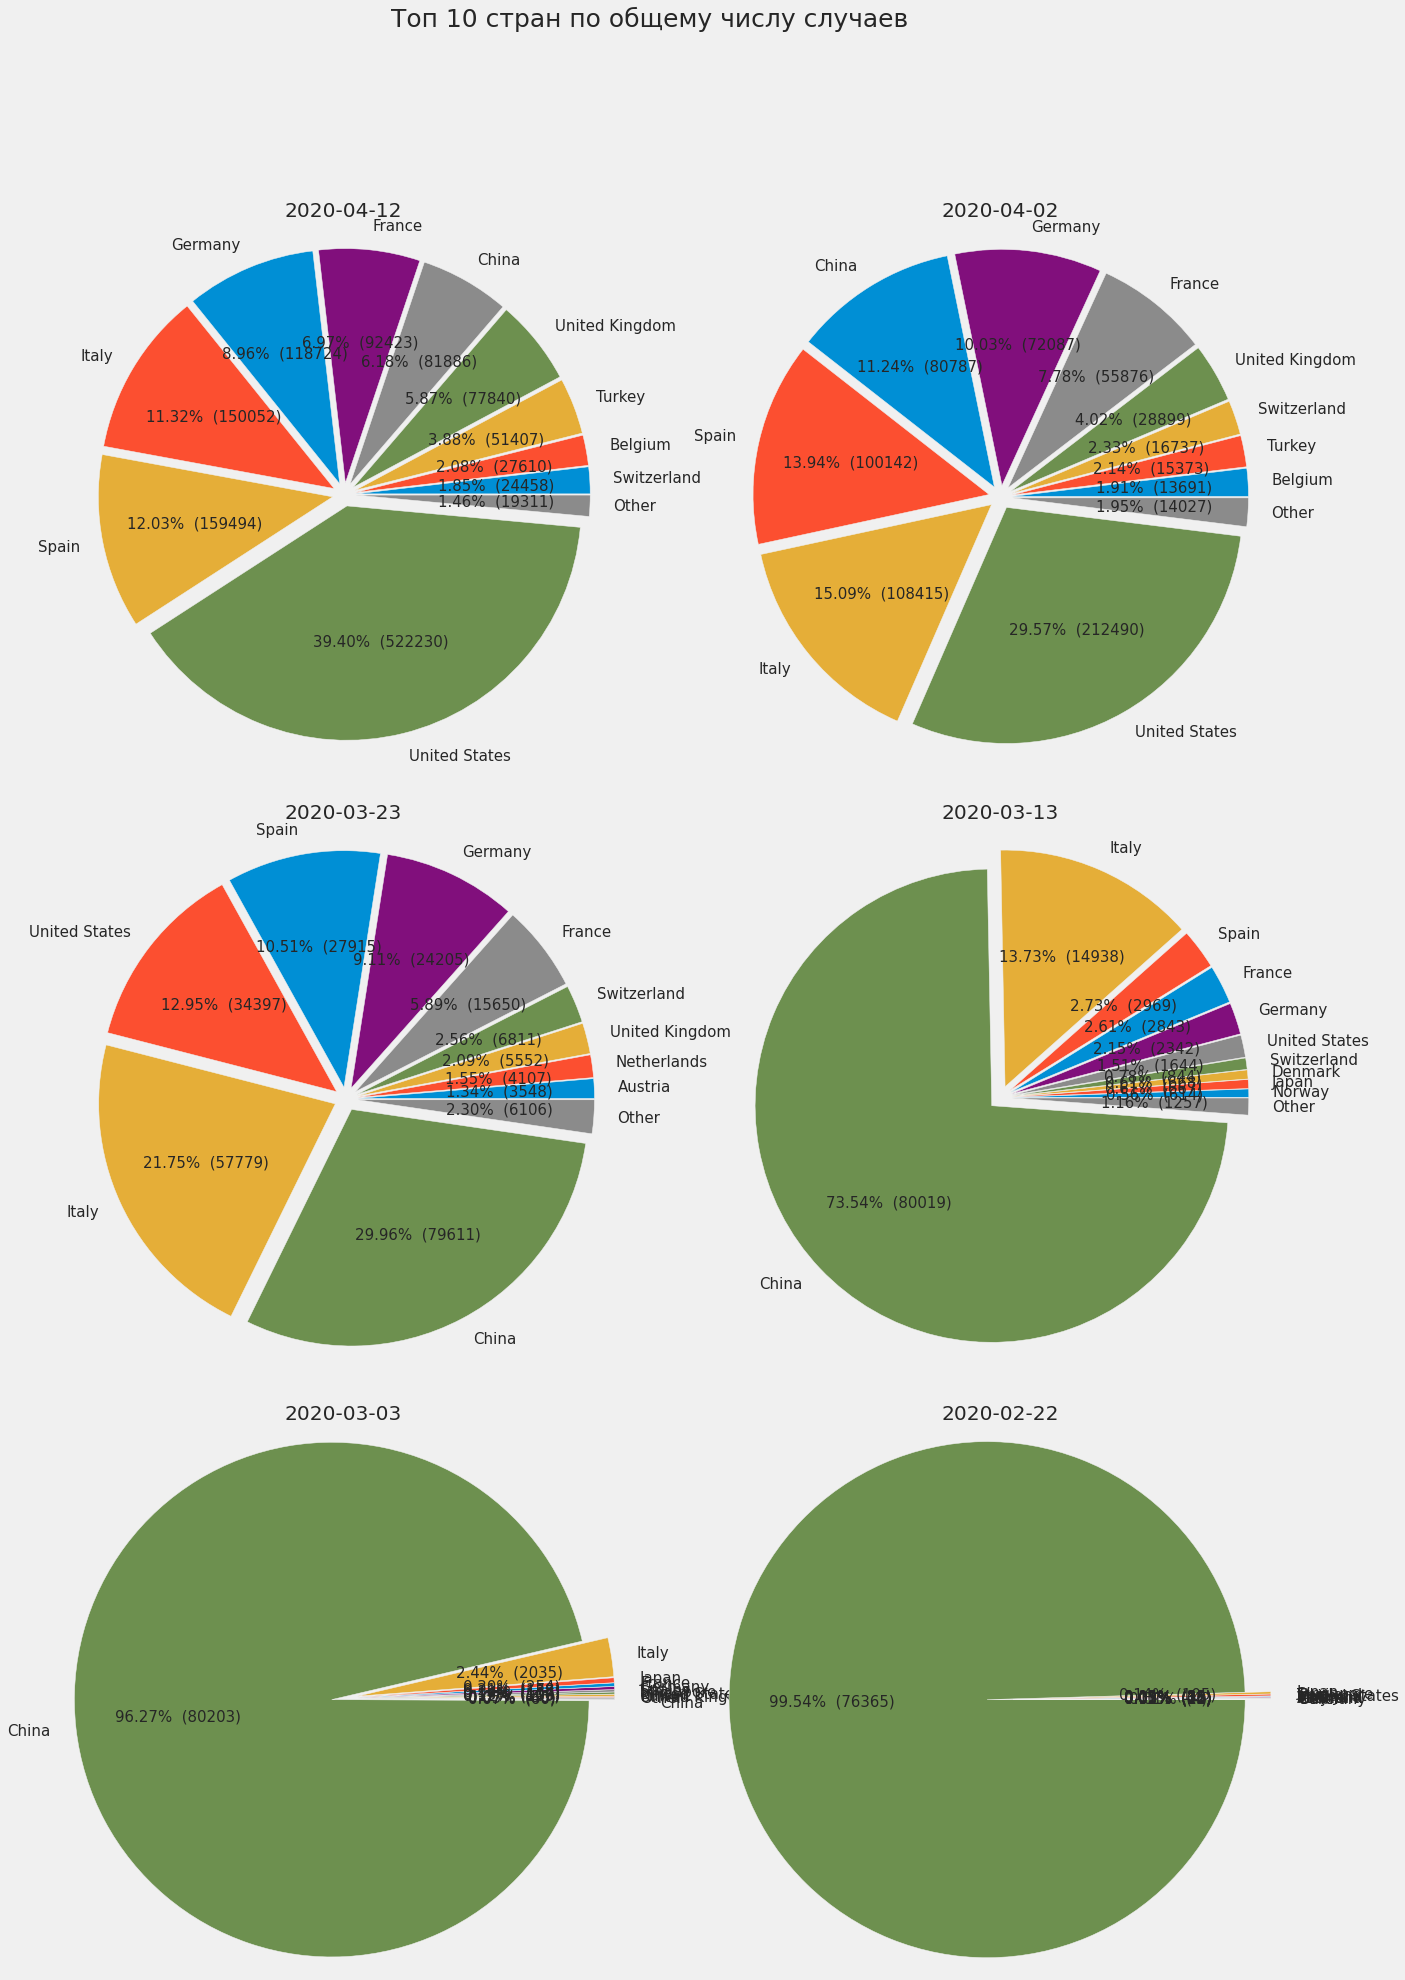

In [37]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct


top_n = 10
fig = plt.figure(figsize=(20, 30))
fig.suptitle(f"Топ {top_n} стран по общему числу случаев", fontsize=25)

fig.subplots_adjust(hspace=0.1, wspace=0.1)

dt = LAST_DATE

for i in range(1, 7):
    ax = fig.add_subplot(3, 2, i)    

    df_on_date = df_corona_country[df_corona_country.date == dt].sort_values("total_cases")

    df_on_date_firts5 = df_on_date.iloc[-top_n:]
    df_on_date_other = df_on_date.iloc[:-top_n]
    df_on_date_other = df_on_date_other.new_cases.sum()

    ax.pie(df_on_date_firts5.total_cases.append(pd.Series(df_on_date_other)), 
           labels=df_on_date_firts5.location.append(pd.Series("Other")), 
           autopct=make_autopct(df_on_date_firts5.total_cases),
           explode = [0.05 for _ in range(top_n+1)],
           textprops = {"fontsize": 15}
          )
    ax.axis('equal')
    ax.title.set_text(dt.date())
    
    
    dt = dt - datetime.timedelta(days=10)
    
    

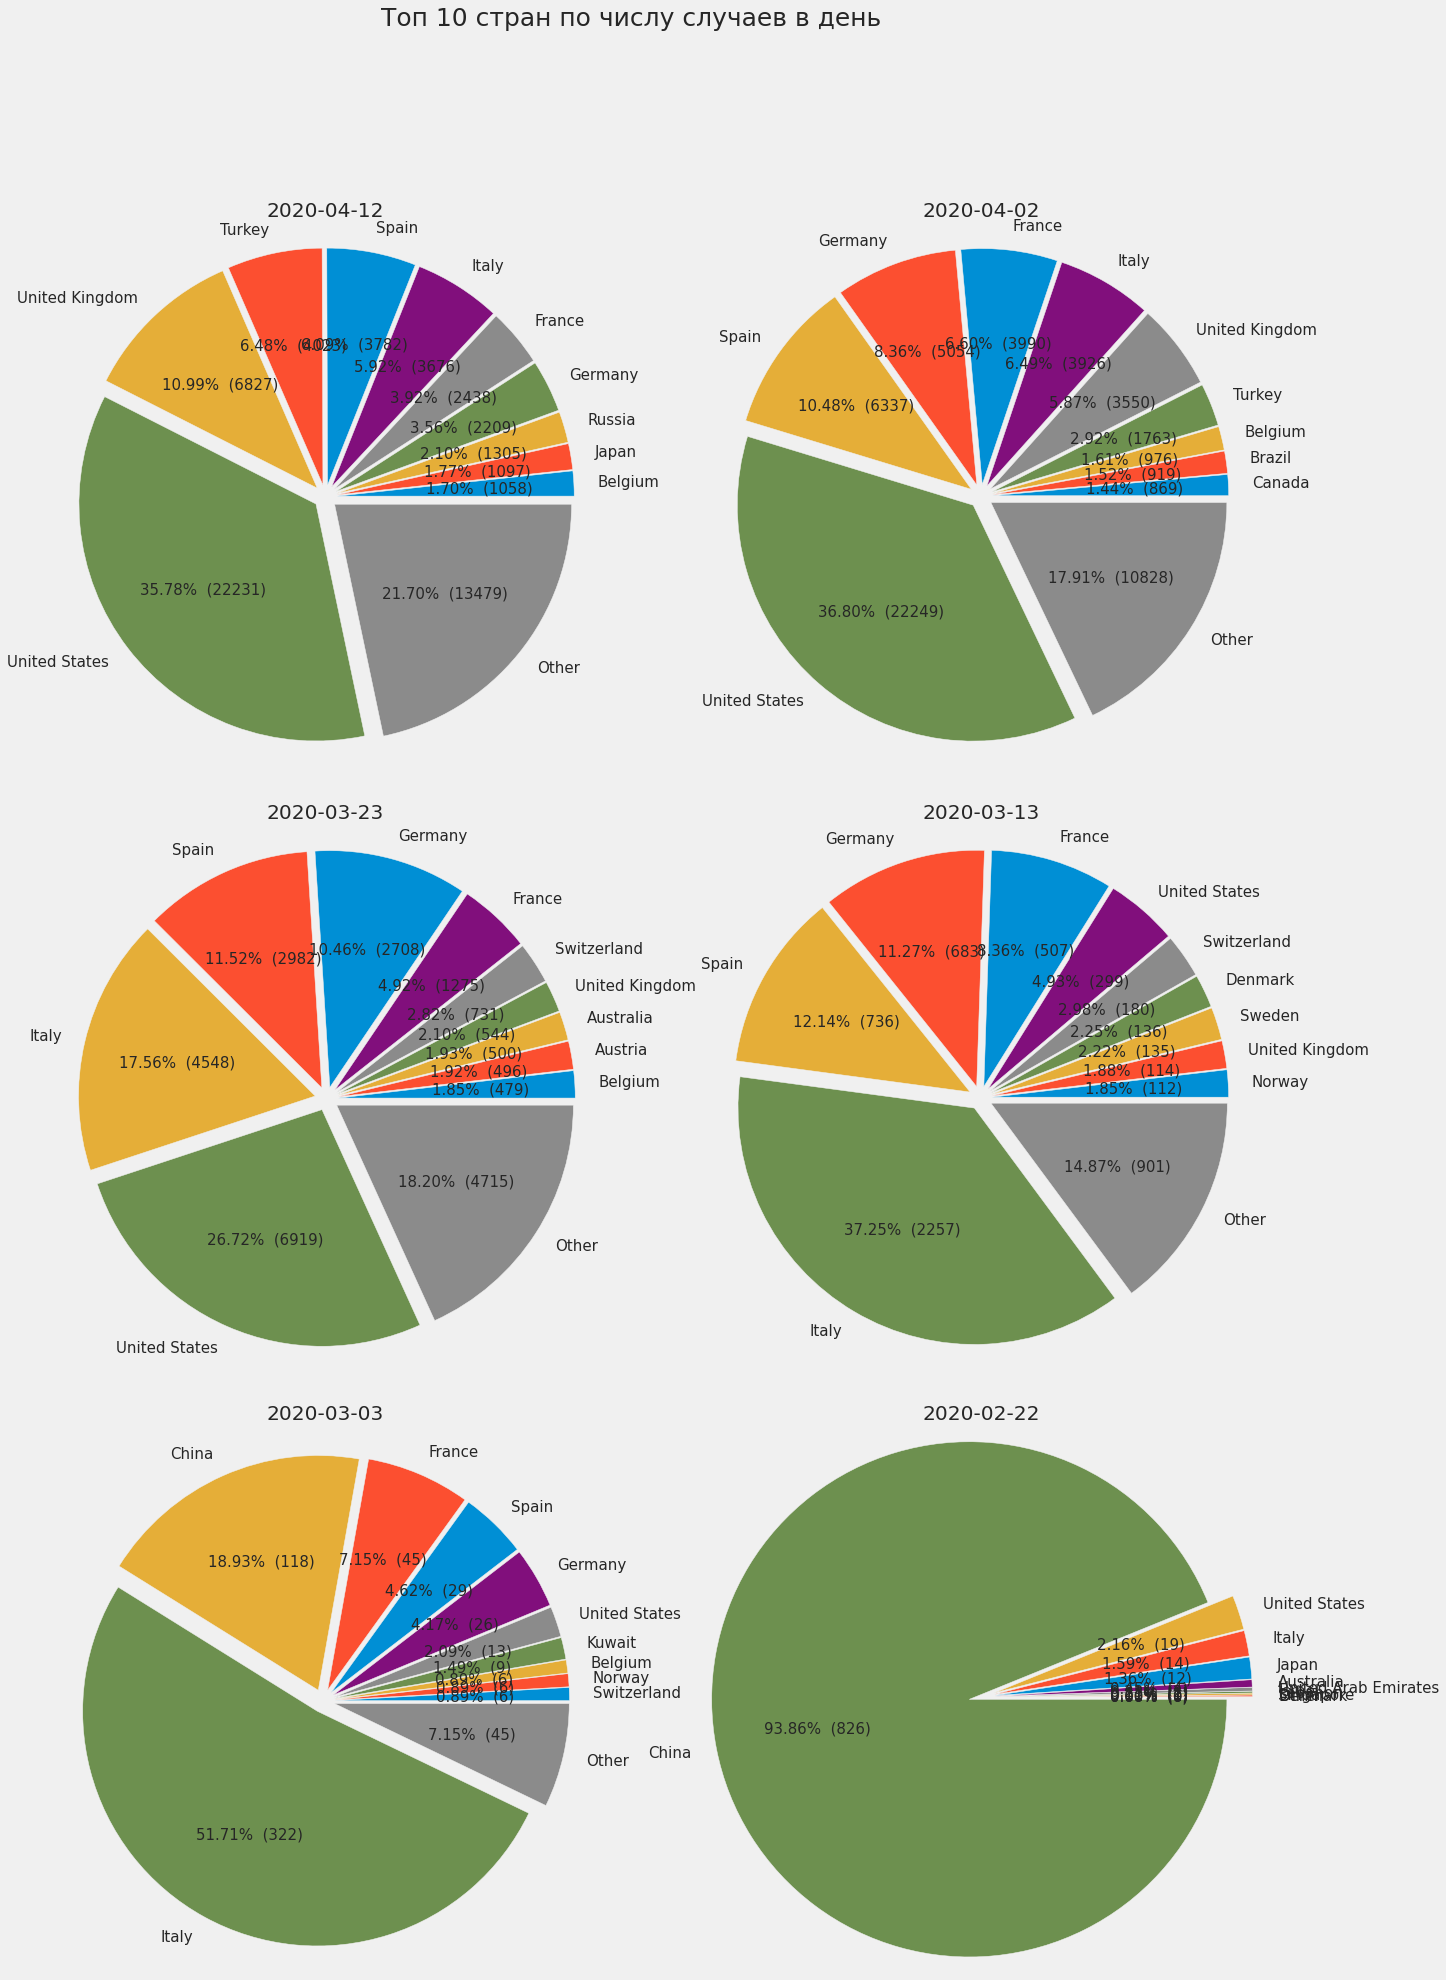

In [36]:


top_n = 10
fig = plt.figure(figsize=(20, 30))
fig.suptitle(f"Топ {top_n} стран по числу случаев в день", fontsize=25)

fig.subplots_adjust(hspace=0.1, wspace=0.1)

dt = LAST_DATE

for i in range(1, 7):
    ax = fig.add_subplot(3, 2, i)   

    df_on_date = df_corona_country[df_corona_country.date == dt].sort_values("new_cases")

    df_on_date_firts5 = df_on_date.iloc[-top_n:]
    df_on_date_other = df_on_date.iloc[:-top_n]
    df_on_date_other = df_on_date_other.new_cases.sum()

    ax.pie(df_on_date_firts5.new_cases.append(pd.Series(df_on_date_other)), 
           labels=df_on_date_firts5.location.append(pd.Series("Other")), 
           autopct=make_autopct(df_on_date_firts5.new_cases),
           explode = [0.05 for _ in range(top_n+1)],
           textprops = {"fontsize": 15}
          )
    ax.axis('equal')
    ax.title.set_text(dt.date())
    
    
    dt = dt - datetime.timedelta(days=10)

## Поищем зависимость числа случаев, от ВВП и населения

Зависимость числа случаев от ВВП и населения

In [39]:

last_df = df_corona_country[df_corona_country.date==LAST_DATE]


Text(50, 50, 'Russia')

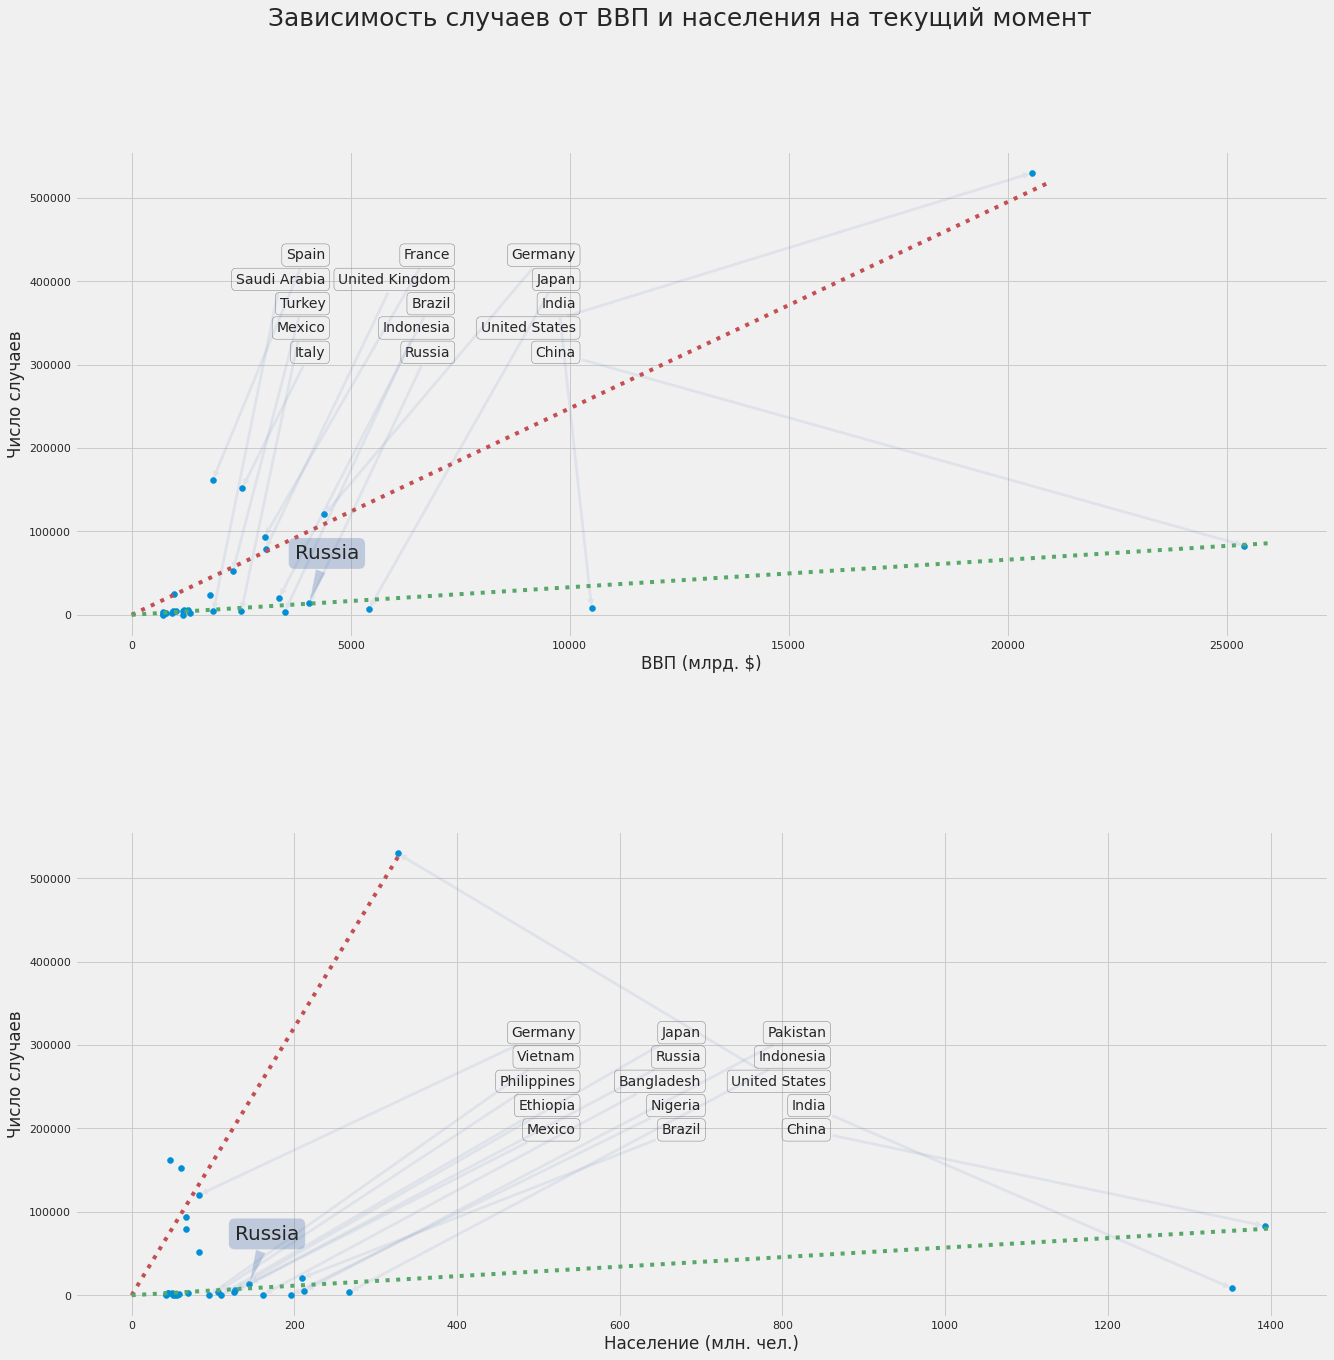

In [107]:
top_n = 30

fig = plt.figure(figsize=(20, 20))
fig.suptitle(f"Зависимость случаев от ВВП и населения на текущий момент", fontsize=25)

fig.subplots_adjust(hspace=0.4, wspace=0.4)

df_top_gdp = last_df.sort_values(by="GDP", ascending=False)[:top_n]
ax = fig.add_subplot(2, 1, 1)
ax.scatter(df_top_gdp.GDP, df_top_gdp.total_cases)
ax.xaxis.label.set_text("ВВП (млрд. $)")
ax.yaxis.label.set_text("Число случаев")

for i in range (int(top_n/2)):
    ax.annotate(df_top_gdp.location.iloc[i], xy=(df_top_gdp.GDP.iloc[i], df_top_gdp.total_cases.iloc[i]),
              xycoords='data',
            xytext=(0.4 - 0.1*(i//5), 0.6 + 0.05*(i%5)), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="simple", alpha=0.1),
            horizontalalignment='right', verticalalignment='top',
            bbox=dict(boxstyle="round", fc="none", ec="gray")
            )


ax.annotate("Russia", xy=(df_top_gdp[df_top_gdp.location == "Russia"].GDP, df_top_gdp[df_top_gdp.location == "Russia"].total_cases),
               xycoords='data',
               xytext=(50, 50), textcoords='offset points',\
              size=20, ha='right', va="center",
             bbox=dict(boxstyle="round", alpha=0.3),
             arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.3)
            )


ax.plot([0,21000], [0, 520000], ':r')
ax.plot([0,26000], [0, 86000], ':g')
    

df_top_pop = last_df.sort_values(by="Population", ascending=False)[:top_n]
ax = fig.add_subplot(2, 1, 2)
ax.scatter(df_top_pop.Population, df_top_pop.total_cases)
ax.xaxis.label.set_text("Население (млн. чел.)")
ax.yaxis.label.set_text("Число случаев")

ax.plot([0,330], [0, 530000], ':r')
ax.plot([0,1400], [0, 80000], ':g')


for i in range (int(top_n/2)):
    ax.annotate(df_top_pop.location.iloc[i], xy=(df_top_pop.Population.iloc[i], df_top_pop.total_cases.iloc[i]),
               xycoords='data',
            xytext=(0.6 - 0.1*(i//5), 0.4 + 0.05*(i%5)), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="simple", alpha=0.1),
            horizontalalignment='right', verticalalignment='top',
            bbox=dict(boxstyle="round", fc="none", ec="gray")
        )

    
    
    
ax.annotate("Russia", xy=(df_top_pop[df_top_pop.location == "Russia"].Population, df_top_pop[df_top_pop.location == "Russia"].total_cases),
               xycoords='data',
               xytext=(50, 50), textcoords='offset points',
               size=20, ha='right', va="center",
             bbox=dict(boxstyle="round", alpha=0.3),
             arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.3)
            )


## Анализ:

В обоих случаях можно заметить две группы точек с линейной зависимостью, в зависимости от местоположения стран (США-Европа или Азия). Россия в обоих случая расположена на зависимости Азии. Для начального предсказания дальнейшей ситуации в России можно взять данные Китая

## Прогноз:

Рассмотрим Китай и попробуем спрогнозировать ситуацию в России, для сравнения также добавим Японию

(737439.0, 737535.15)

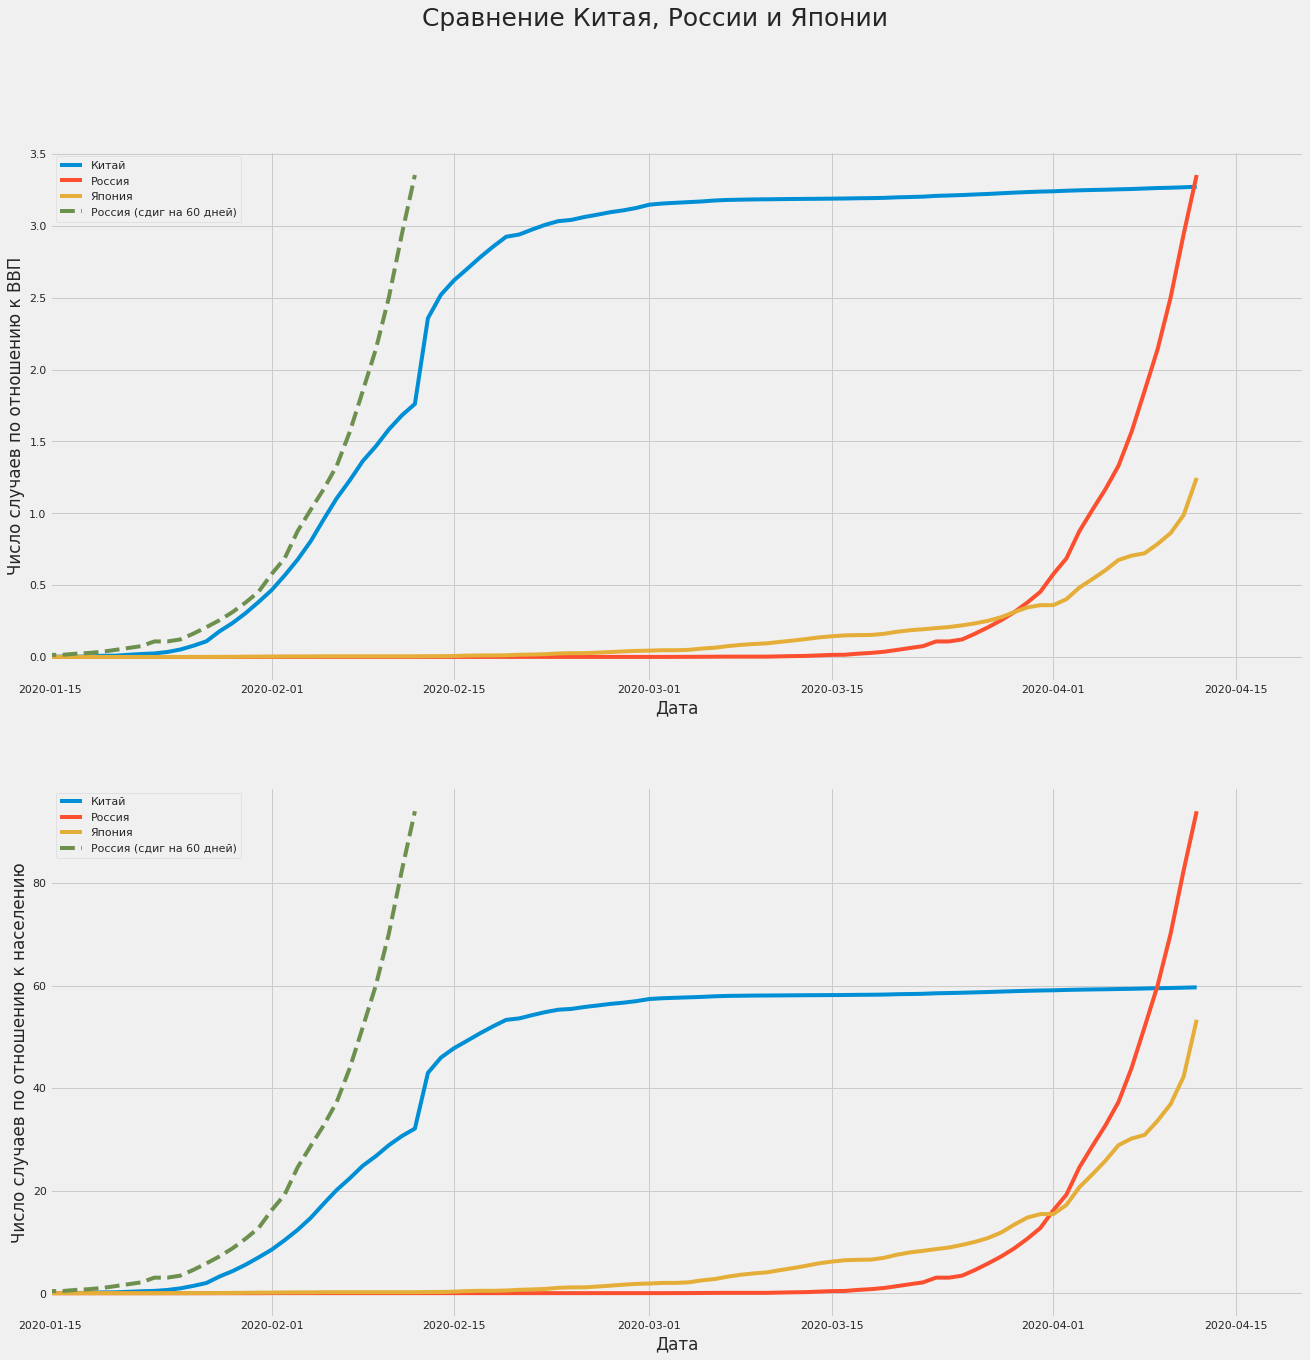

In [19]:
country = "Japan"
df_j = df_corona_country[df_corona_country.location == country]


fig = plt.figure(figsize=(20, 20))
fig.suptitle("Сравнение Китая, России и Японии", fontsize=25)

ax = fig.add_subplot(2, 1, 1)
ax.plot(df_c.date, df_c.total_by_gdp, label="Китай")
ax.plot(df_r.date,df_r.total_by_gdp, label="Россия")
ax.plot(df_j.date,df_j.total_by_gdp, label="Япония")
ax.plot(df_r.date-datetime.timedelta(days=60),df_r.total_by_gdp, label="Россия (сдиг на 60 дней)", linestyle="--")
ax.legend()
ax.set_xlabel("Дата")             
ax.set_ylabel("Число случаев по отношению к ВВП") 
ax.set_xlim(pd.to_datetime("2020-01-15"))


ax = fig.add_subplot(2, 1, 2)   
ax.plot(df_c.date, df_c.total_by_pop, label="Китай")
ax.plot(df_r.date,df_r.total_by_pop, label="Россия")
ax.plot(df_j.date,df_j.total_by_pop, label="Япония")
ax.plot(df_r.date-datetime.timedelta(days=60),df_r.total_by_pop, label="Россия (сдиг на 60 дней)", linestyle="--")
ax.legend()
ax.set_xlabel("Дата")             
ax.set_ylabel("Число случаев по отношению к населению") 
ax.set_xlim(pd.to_datetime("2020-01-15"))



## Выводы:

Российский сценарий отстает от китайского на 2 месяца и идет сопостовимо с японским, в скором времени можно ждать прекращения геометрического роста числа случаев и выход на полку
